# Wikipedia administrator elections

*Davide Riva, Università degli Studi di Milano, Laurea Magistrale in Data Science & Economics*

---

In [1]:
import networkx as nx
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

In [3]:
wiki_vote = nx.read_edgelist("Wiki-Vote.txt", create_using = nx.DiGraph())

C:\Users\DavideR\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\DavideR\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


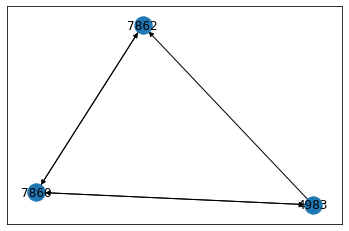

In [4]:
random_ego = nx.ego_graph(wiki_vote, n = list(wiki_vote.nodes)[np.random.randint(0, len(list(wiki_vote.nodes)))])
nx.draw_networkx(random_ego, pos = nx.spring_layout(random_ego))

### Degree distributions

The directed graph representing the network is made of 7115 nodes and 103689 arcs. Among the 7115 users of Wikipedia who participated the election, 2381 have in-degree $d_{IN} > 0$, meaning that they were candidates and received at least one vote. It's more than 34% of participants, which makes the network analysis of the election interesting. As for the out-degree, the users that actively participated by expressing at least one preference are 6110, almost 86% of the total. However, none of the 1005 non-voting users has $d_{IN} = 0$, so no node is isolated.

In [5]:
indeg = dict(wiki_vote.in_degree)
outdeg = dict(wiki_vote.out_degree)

In [6]:
# find the nodes that have out-degree = 0

outdeg_keys = list(outdeg.keys())
outdeg_vals = list(outdeg.values())
zero_votes_nodes = list()

for i in range(len(outdeg_vals)):
    if outdeg_vals[i] == 0:
        zero_votes_nodes.append(outdeg_keys[i])

In [7]:
# find if the in-degree of those nodes is 0, so to identify isolated nodes

zero_votes_nodes_indeg = [indeg[k] for k in zero_votes_nodes]
n_isolated = sum([int(l == 0) for l in zero_votes_nodes_indeg])

In [8]:
# import the Poisson module, to compare the degree distribution with that of an Erdos-Renyi model

from scipy.stats import poisson

Text(0.5, 0.98, 'Wikipedia election degree CCDFs')

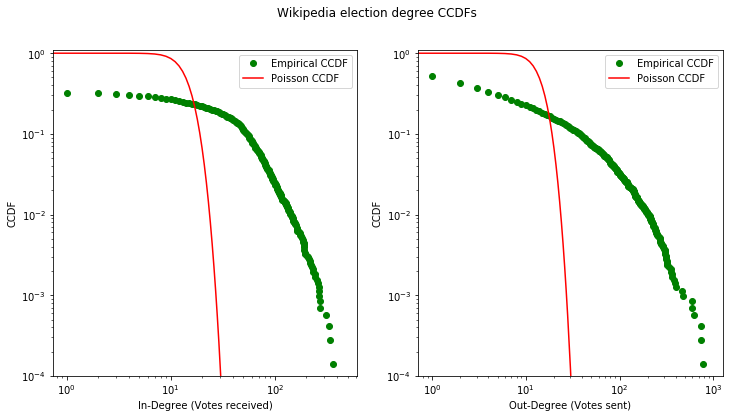

In [9]:
# complementary cumulative distribution function for the in-degree and the out-degree

indeg_vals = list(indeg.values())

cdf_in = ECDF(indeg_vals)
x_in = np.unique(indeg_vals)
y_in = 1 - cdf_in(x_in)
poisson_in = 1 - poisson.cdf(k = x_in, mu = np.mean(indeg_vals))

cdf_out = ECDF(outdeg_vals)
x_out = np.unique(outdeg_vals)
y_out = 1 - cdf_out(x_out)
poisson_out = 1 - poisson.cdf(k = x_out, mu = np.mean(outdeg_vals))

f, (ax1, ax2) = plt.subplots(nrows = 1, ncols= 2, figsize=(12, 6))

eccdf_in, = ax1.loglog(x_in, y_in, 'go')
eccdf_in.set_label("Empirical CCDF")
pccdf_in, = ax1.loglog(x_in, poisson_in, 'r-')
pccdf_in.set_label("Poisson CCDF")
ax1.set_xlabel("In-Degree (Votes received)")
ax1.set_ylabel("CCDF")
ax1.set_ylim(0.0001, 1.1)
ax1.legend()

eccdf_out, = ax2.loglog(x_out, y_out, 'go')
eccdf_out.set_label("Empirical CCDF")
pccdf_out, = ax2.loglog(x_out, poisson_out, 'r-')
pccdf_out.set_label("Poisson CCDF")
ax2.set_xlabel("Out-Degree (Votes sent)")
ax2.set_ylabel("CCDF")
ax2.set_ylim(0.0001, 1.1)
ax2.legend()

f.suptitle("Wikipedia election degree CCDFs")

In [10]:
# who are the 4 candidates that received the highest number of votes?

ordered_indeg = sorted(indeg.items(), key = lambda t: t[1], reverse = True)
ordered_indeg

[('4037', 457),
 ('15', 361),
 ('2398', 340),
 ('2625', 331),
 ('1297', 309),
 ('2565', 274),
 ('762', 272),
 ('2328', 266),
 ('5254', 265),
 ('3352', 264),
 ('4191', 259),
 ('2066', 254),
 ('1549', 245),
 ('3089', 244),
 ('2535', 232),
 ('737', 231),
 ('4335', 228),
 ('3456', 223),
 ('5412', 219),
 ('3334', 217),
 ('2654', 213),
 ('7620', 208),
 ('6634', 203),
 ('4712', 197),
 ('1633', 195),
 ('4735', 195),
 ('1186', 193),
 ('3537', 193),
 ('271', 192),
 ('2576', 192),
 ('3459', 191),
 ('7553', 190),
 ('1026', 189),
 ('1211', 188),
 ('3117', 186),
 ('3897', 186),
 ('993', 181),
 ('2237', 181),
 ('4875', 181),
 ('7632', 178),
 ('214', 175),
 ('5459', 175),
 ('4536', 173),
 ('6832', 170),
 ('2516', 167),
 ('2657', 165),
 ('5079', 165),
 ('8293', 164),
 ('4099', 164),
 ('2651', 162),
 ('2653', 162),
 ('2871', 162),
 ('5022', 162),
 ('2485', 160),
 ('299', 158),
 ('5210', 158),
 ('7092', 155),
 ('72', 154),
 ('3084', 153),
 ('5484', 153),
 ('2775', 151),
 ('56', 149),
 ('2470', 149),
 ('5

In the picture, both the in-degree and the out-degree present a large tail distribution, confirming the voting process is not random. Indeed, there are many candidates who attracted only few votes (for instance, 78 were voted only by 1 other user) and many attracted a number of votes far larger than average. In particular, the average degree is 14.57, whereas the best four candidates received 457, 361, 340 and 331 votes respectively. Moreover, many users also submitted only few votes (2382 voting only 1 other user), whereas a few submitted many votes, up to 893, maybe a signal of what some political scientist referred to as "time aristocracy" (a phenomenon for which those who have more free time have an higher power on the political agenda).

But what if we removed from the in-degree distribution those that received 0 votes? This way of proceeding is perfectly sensible if we assumed these people hadn't proposed their nomination to the admin election. As shown in the graph below, however, this approach doesn't change the results.

In [11]:
new_indeg = list()

for s in indeg.items():
    if s[1] > 0:
        new_indeg.append(s[1])

Text(0.5, 0.98, 'In-Degree CCDF among non-null candidates')

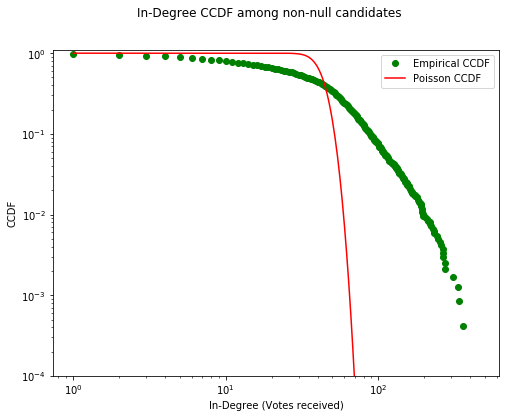

In [12]:
new_cdf = ECDF(new_indeg)
new_x = np.unique(new_indeg)
new_y = 1 - new_cdf(new_x)
new_poisson_in = 1 - poisson.cdf(k = new_x, mu = np.mean(new_indeg))

f, ax = plt.subplots(figsize=(8,6))

new_eccdf, = ax.loglog(new_x, new_y, 'go')
new_eccdf.set_label("Empirical CCDF")
new_pccdf, = ax.loglog(new_x, new_poisson_in, 'r-')
new_pccdf.set_label("Poisson CCDF")
ax.set_xlabel("In-Degree (Votes received)")
ax.set_ylabel("CCDF")
ax.set_ylim(0.0001, 1.1)
ax.legend()

f.suptitle("In-Degree CCDF among non-null candidates")

In [13]:
np.mean(new_indeg)

43.54850902981941

### Connected components

Looking for the strongly connected components doesn't make much sense in this context. What is more interesting is the analysis of weakly connected components, whose dimension and numerosity become indicators of the fragmentation of the electoral base:

- if the network is made of many small connected components, then voters clustered around their favourite candidate;

- otherwise, the support bases of different candidates overlapped, indicating that voters considered more than one candidate.

The second condition holds true: there are only 24 WCCs, one of which contains 7066 nodes. This means that, except for a few isolated cases (involving 49 nodes) in which a voter voted for only one candidate and that candidate received only that single vote (or two at most), voters didn't cluster around their favourite candidates but considered also others.

In [14]:
wcc = nx.weakly_connected_components(wiki_vote)
wcc_cardinalities = [len(cc) for cc in wcc]

Text(0.5, 0.98, 'Distribution of WCC cardinality')

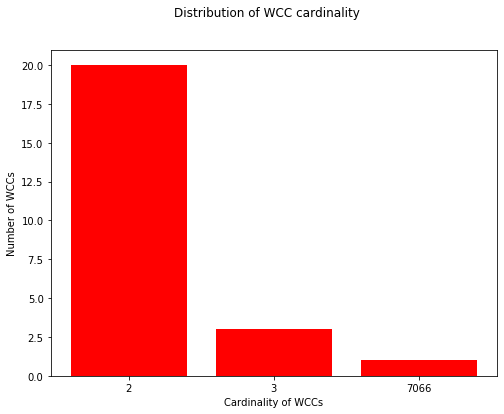

In [15]:
wcc_card_vals = np.unique(wcc_cardinalities)
n_wcc = [wcc_cardinalities.count(c) for c in wcc_card_vals]
wcc_card_vals = [str(c) for c in wcc_card_vals]

f, ax = plt.subplots(figsize = (8,6))
ax.bar(wcc_card_vals, n_wcc, color = 'red')
ax.set_xlabel("Cardinality of WCCs")
ax.set_ylabel("Number of WCCs")
f.suptitle("Distribution of WCC cardinality")

However, this situation may be due to two different (but not mutually exclusive) reasons:

- voters may vote more than one candidate, thus confirming the previous hypothesis, as displayed in the figure on the left, or

- candidates may vote each other, as displayed on the right.

In [16]:
G1 = nx.DiGraph()
G1.add_nodes_from(['A','B','C','D','E','F','G'])
G1.add_edges_from([('A','D'),('B','D'),('C','D'),('C','E'),('F','E'),('G','E')])

G2 = nx.DiGraph()
G2.add_nodes_from(G1)
G2.add_edges_from([('A','D'),('B','D'),('C','D'),('D','E'),('F','E'),('G','E')])

Text(0.5, 0.98, 'Examples of Weakly Connected Components')

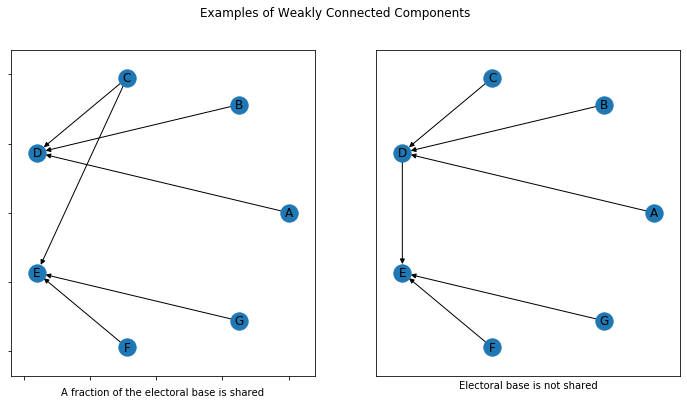

In [17]:
f, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))
nx.draw_networkx(G1, pos = nx.shell_layout(G1), arrows = True, with_labels = True, ax = ax1)
nx.draw_networkx(G2, pos = nx.shell_layout(G2), arrows = True, with_labels = True, ax = ax2)

ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.set_xlabel("A fraction of the electoral base is shared")
ax2.set_xlabel("Electoral base is not shared")
f.suptitle("Examples of Weakly Connected Components")

In order to investigate these possible features, looking at strongly connected components in the largest WCC may be helpful. Indeed, although SCCs don't represent any relationship among the electoral bases (that's why I previously argued they wouldn't be my primary interest), they would actually account for candidate-candidate relationships, i.e. candidates who voted for other candidates. If $\mid{SCC}\mid > 2$ for many SCCs, or if there is a "giant" SCC, then we could infer that the phenomenon is widespread in the Wikipedia admin election. This kind of analysis reveals that most SCCs are isolated couples, but there exists one that comprises 1300 nodes. In fact, by looking at the following graph, it may be noticed that many candidates who received a significant number of votes also submitted a significant number of votes. A special mention is deserved by user "2565", who submitted 893 votes while receiving 274.

An explanation for this phenomenon is the presence of the so-called "follow4follow" relationships, in which a user follows (or, in this case, votes) another one just to get followed back. I will consider this feature in depth in the reciprocity analysis. For the moment being, let's just acknowledge the fact that the electoral base is not necessarely shared among candidates (a feature that will be analyzed in detail when looking at structural similarity), but candidates voted each other more frequently than expected.

In [18]:
wcc_nets = list(nx.weakly_connected_component_subgraphs(wiki_vote))
giant_wcc = max(wcc_nets, key = lambda g: g.order())

In [19]:
scc = nx.strongly_connected_components(giant_wcc)
scc_cardinalities = [len(cc) for cc in scc]

In [20]:
candidate_voting=list()

for t in indeg.items():
    if t[1] > 0:
        candidate_voting.append((t[1],outdeg[t[0]]))

Text(0.5, 0.98, 'Received-submitted votes relationship')

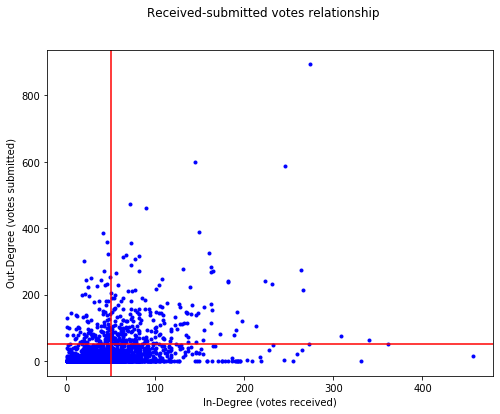

In [26]:
x,y = zip(*candidate_voting)

f, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, 'b.')
ax.axvline(x = 50, color = "red")
ax.axhline(y = 50, color = "red")
ax.set_xlabel("In-Degree (votes received)")
ax.set_ylabel("Out-Degree (votes submitted)")
f.suptitle("Received-submitted votes relationship")

In [25]:
n_high_in_high_out = [int(x[i]>=50 and y[i]>=50) for i in range(len(x))]
sum(n_high_in_high_out)

226

### Centrality

Only eigenvector centrality makes any sense.

In [27]:
# eigenvector centrality (in-degree based)

ec = nx.eigenvector_centrality(wiki_vote)
nx.set_node_attributes(wiki_vote, ec, "eigenvector_centrality")

### Reciprocity

In [28]:
# we're interested in overall reciprocity as a possible cause for the giant WCC
# NB: NetworkX uses the edge-based definition of reciprocity, not the dyad-based one

nx.overall_reciprocity(giant_wcc)

0.056471450758708505

In [29]:
wcc_indeg = list(dict(giant_wcc.in_degree).values())
wcc_indeg_zero_count = wcc_indeg.count(0)

In [30]:
# but overall reciprocity is almost meaningless, since 4708 users in the giant WCC didn't receive any vote
# to verify the presence of a "follow4follow" tie between voted users, we must keep only them (nodes with in-degree > 0)

wcc_candidates = giant_wcc.copy()
for v in giant_wcc.nodes:
    if indeg[v] == 0:
        wcc_candidates.remove_node(v)

In [31]:
nx.overall_reciprocity(wcc_candidates)  # overall reciprocity measure almost doubles, now 10% of votes are reciprocated

0.10104601788241792

In [33]:
# and in the largest SCC?

scc_nets = list(nx.strongly_connected_component_subgraphs(giant_wcc))
giant_scc = max(scc_nets, key = lambda g: g.order())

In [34]:
nx.overall_reciprocity(giant_scc)   # even in the largest SCC, the percentage of reciprocated votes doesn't exceed 15%

0.14836780210867803

### Structural similarity

In [35]:
import seaborn as sb

In [36]:
# we're interested in overlapping voter bases as a possible cause for the giant WCC
# that can be measured as the fraction of common predecessors over all predecessors of 2 nodes

candidate_list = list(wcc_candidates.nodes)
N = len(candidate_list)
candidate_pairs = [(candidate_list[i],candidate_list[j]) for i in range(N) for j in range(i+1, N)]

In [37]:
wcc_indeg = dict(giant_wcc.in_degree)
cosine_sim = list()
jaccard_sim = list()

for t in candidate_pairs:
    den_cosine = np.sqrt(wcc_indeg[t[0]]*wcc_indeg[t[1]])  # cosine similarity denominator
    
    A_voters = list(giant_wcc.predecessors(t[0]))
    B_voters = list(giant_wcc.predecessors(t[1]))
    num = len(set(A_voters).intersection(B_voters)) # structural similarities numerator (intersection of neighborhoods)
    
    den_jaccard = len(set(A_voters).union(B_voters)) # Jaccard similarity denominator (union of neighborhoods)
    
    cosine_sim.append(num/den_cosine)
    jaccard_sim.append(num/den_jaccard)

In [38]:
# represent the distribution of structural similarity both with density and CCDF

cosine_cdf = ECDF(cosine_sim)
x_cosine = np.unique(cosine_sim)
y_cosine = 1 - cosine_cdf(x_cosine)

jaccard_cdf = ECDF(jaccard_sim)
x_jaccard = np.unique(jaccard_sim)
y_jaccard = 1 - jaccard_cdf(x_jaccard)

Text(0.5, 0.98, 'Distribution of structural predecessor similarity measures')

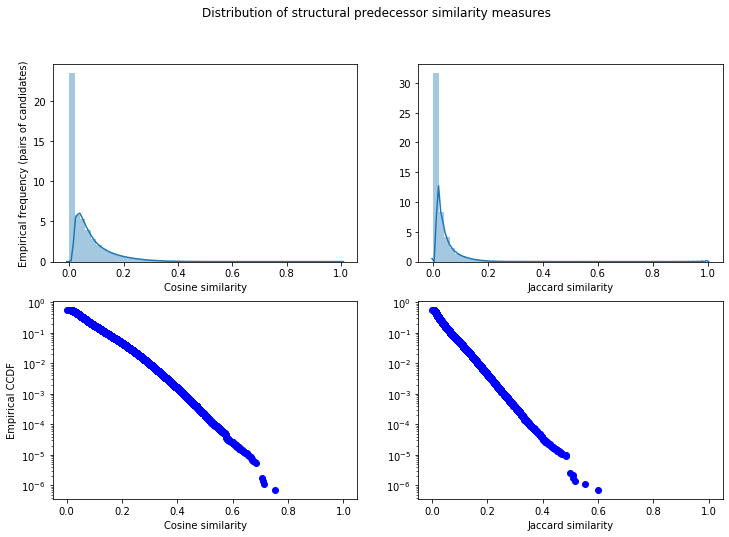

In [39]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize=(12,8))

sb.distplot(cosine_sim, ax = ax1)
ax1.set_xlabel("Cosine similarity")
ax1.set_ylabel("Empirical frequency (pairs of candidates)")

sb.distplot(jaccard_sim, ax = ax2)
ax2.set_xlabel("Jaccard similarity")

ax3.semilogy(x_cosine, y_cosine, 'bo')
ax3.set_xlabel("Cosine similarity")
ax3.set_ylabel("Empirical CCDF")

ax4.semilogy(x_jaccard, y_jaccard, 'bo')
ax4.set_xlabel("Jaccard similarity")

f.suptitle("Distribution of structural predecessor similarity measures")

In [40]:
# what are the mean, the variance and the median of each?

cos_mean = np.mean(cosine_sim)
cos_var = np.var(cosine_sim)
cos_median = np.median(cosine_sim)

jac_mean = np.mean(jaccard_sim)
jac_var = np.var(jaccard_sim)
jac_median = np.median(jaccard_sim)

In [41]:
cos_mean, cos_var, cos_median, jac_mean, jac_var, jac_median

(0.04948782224022037,
 0.004675723773343196,
 0.025565499628245683,
 0.02354769083732305,
 0.001312500974793405,
 0.010526315789473684)

### Degree assortativity

In [42]:
# in-in : did "people who received many votes" vote for "people who received many votes" ?

nx.degree_assortativity_coefficient(wiki_vote, x = 'in', y = 'in')

0.0050910065792612895

In [43]:
# in-out : did "people who received many votes" vote for "people who submitted many votes" ?

nx.degree_assortativity_coefficient(wiki_vote, x = 'in', y = 'out')

0.007095795579867646

In [44]:
# out-in : did "people who submitted many votes" vote for "people who received many votes" ?

nx.degree_assortativity_coefficient(wiki_vote, x = 'out', y = 'in') 

-0.08324455771686808

In [45]:
# out-out : did "people who submitted many votes" vote for "people who submitted many votes" ?

nx.degree_assortativity_coefficient(wiki_vote, x = 'out', y = 'out')

-0.018909153225472354

### Triadic census

In [46]:
nx.triads.triadic_census(giant_wcc)

{'003': 58076336844,
 '012': 664787743,
 '102': 19545374,
 '021D': 5796637,
 '021U': 3232661,
 '021C': 2746838,
 '111D': 357461,
 '111U': 558525,
 '030T': 462715,
 '030C': 6795,
 '201': 28288,
 '120D': 45559,
 '120U': 58259,
 '120C': 17667,
 '210': 15275,
 '300': 2119}

In [47]:
nx.triads.triadic_census(wcc_candidates)

{'003': 2059536459,
 '012': 110427877,
 '102': 5995069,
 '021D': 3320336,
 '021U': 739028,
 '021C': 1246089,
 '111D': 151441,
 '111U': 558525,
 '030T': 240361,
 '030C': 6795,
 '201': 28288,
 '120D': 21568,
 '120U': 58259,
 '120C': 17667,
 '210': 15275,
 '300': 2119}

In [48]:
nx.triads.triadic_census(giant_scc)

{'003': 321561264,
 '012': 37232579,
 '102': 3128763,
 '021D': 1354445,
 '021U': 484223,
 '021C': 777168,
 '111D': 149851,
 '111U': 351207,
 '030T': 154181,
 '030C': 6795,
 '201': 28288,
 '120D': 21358,
 '120U': 36917,
 '120C': 17667,
 '210': 15275,
 '300': 2119}

### Communities

In [78]:
from networkx.algorithms.community import greedy_modularity_communities, modularity

In [67]:
# communities can be analyzed in the undirected version of the graph

greedy_comm = list(greedy_modularity_communities(wiki_vote.to_undirected()))

In [68]:
partition_greedy = {}
for i, comm in enumerate(greedy_comm):
    for n in comm:
        partition_greedy[n]=i

In [69]:
nx.set_node_attributes(wiki_vote, partition_greedy, "greedy_community")

In [72]:
len(np.unique(list(partition_greedy.values())))

55

In [79]:
greedy_mod = modularity(wiki_vote.to_undirected(), greedy_comm)

In [80]:
greedy_mod

0.3402034229616639

In [74]:
# the greedy algorithm finds 55 communities
# try with Louvain

import community as louv

In [75]:
partition_louvain = louv.best_partition(wiki_vote.to_undirected())
nx.set_node_attributes(wiki_vote, partition_louvain, "louvain_community")

In [76]:
len(np.unique(list(partition_louvain.values())))

30

In [82]:
louvain_comm = [set() for i in range(len(np.unique(list(partition_louvain.values()))))]

for n, comm in partition_louvain.items():
    louvain_comm[comm].add(n)

In [83]:
louvain_mod = modularity(wiki_vote.to_undirected(), louvain_comm)
louvain_mod

0.4247737875784922

### Write file for Gephi

In [89]:
nx.write_gexf(wiki_vote, "wiki_vote.gexf")